In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import scipy

In [2]:
directory_path = "/content/data/"
directory_files = os.listdir(directory_path)

In [9]:
x_mean = []
x_std = []
x_max = []
x_min = []

y_mean = []
y_std = []
y_max = []
y_min = []


z_mean = []
z_std = []
z_max = []
z_min = []


n_mean = []
n_std = []
n_max = []
n_min = []

f_mean = []
f_std = []
f_max = []
f_min = []


labels = []

for path in directory_files:
  try:
    df_file = pd.read_csv(os.path.join(directory_path, path),header=1,skip_blank_lines=True,skiprows =[0,1,2,3])
    df_file_info = pd.read_csv(os.path.join(directory_path, path),header=None,nrows=4,skip_blank_lines=True)
    activity = df_file_info.iloc[2,1].lower()
    activity = 'run' if 'run' in activity else 'walk'
    actucal_steps = df_file_info.iloc[3,1]
    norm = []
    cols = df_file.columns
    for i, row in df_file.iterrows():
      x = float(row[cols[1]])
      y = float(row[cols[2]])
      z = float(row[cols[3]])
      norm.append((x**2 + y**2 + z**2) ** 0.5)
    norm = np.array(norm)
    df_file['norm'] = norm
    cols = df_file.columns
    vals = df_file[cols[1]].values

    x_mean.append(vals.mean())
    x_std.append(vals.std())
    x_max.append(vals.max())
    x_min.append(vals.min())
    vals = df_file[cols[2]].values
    y_mean.append(vals.mean())
    y_std.append(vals.std())
    y_max.append(vals.max())
    y_min.append(vals.min())
    vals = df_file[cols[3]].values
    z_mean.append(vals.mean())
    z_std.append(vals.std())
    z_max.append(vals.max())
    z_min.append(vals.min())
    vals = df_file[cols[4]].values
    n_mean.append(vals.mean())

    n_std.append(vals.std())
    n_max.append(vals.max())
    n_min.append(vals.min())
    norm = np.array(norm)
    fft = np.fft.fft(norm)
    time_vals = df_file[cols[0]].values
    dt = time_vals[1]-time_vals[0]
    n = len(norm)
    frequencies = np.fft.fftfreq(n, dt)
    f_mean.append(frequencies.mean())
    f_std.append(frequencies.std())
    f_max.append(frequencies.max())
    f_min.append(frequencies.min())
    labels.append(1 if activity == 'run' else 0)


  except Exception as error:
    print(error)
    continue

could not convert string to float: 'walk_4_1.csv'


## Norm

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1311: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:521: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


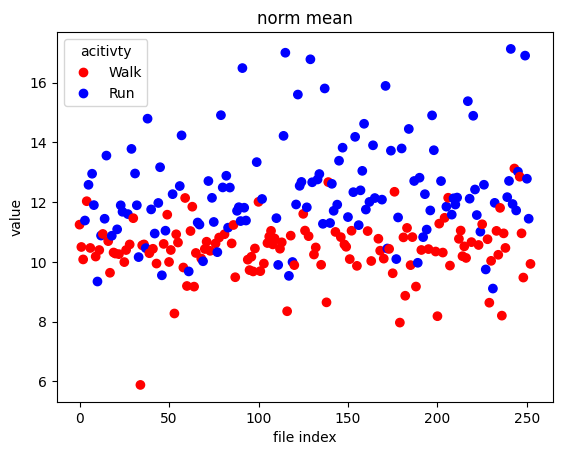

Ttest_indResult(statistic=-11.087186935384608, pvalue=1.7595224590984403e-23)



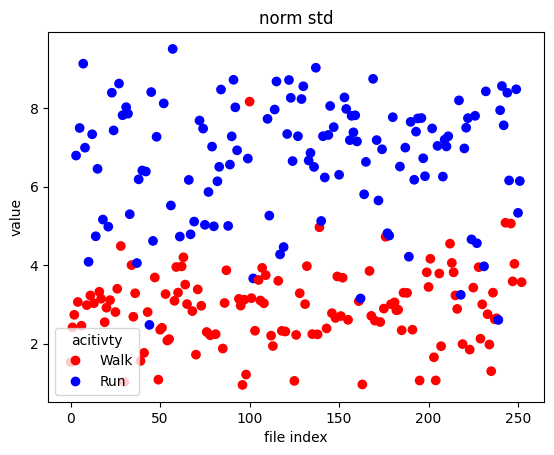

Ttest_indResult(statistic=-23.379054269025513, pvalue=9.458038140043002e-65)



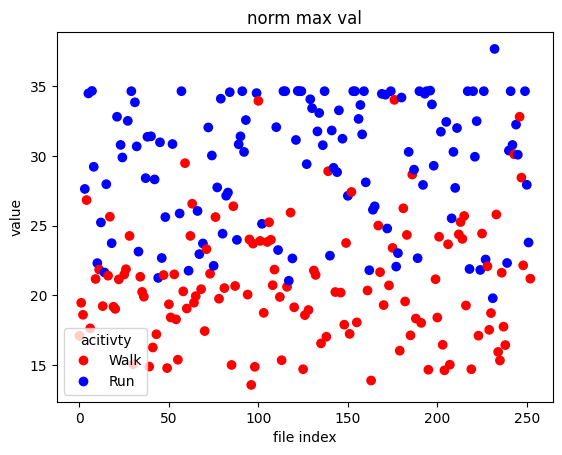

Ttest_indResult(statistic=-15.719347694860028, pvalue=3.8168637181251863e-39)



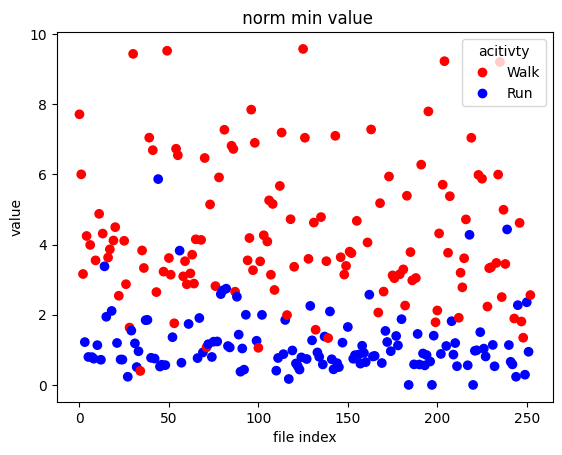

Ttest_indResult(statistic=16.002926368152217, pvalue=4.0386874950156245e-40)



In [4]:
label_colors = {"walk": 'red', "run" : 'blue'}
colors = ListedColormap(['red', 'blue'])

for l_name,str_name in zip([n_mean,n_std ,n_max ,n_min],["norm mean", "norm std", "norm max val"," norm min value"]):

  list_np = np.array(l_name)
  run_vals = list_np[np.array(labels)==1]
  run_vals = run_vals[~np.isnan(run_vals)]
  walk_vals = list_np[np.array(labels)==0]
  walk_vals = walk_vals[~np.isnan(walk_vals)]
  t = scipy.stats.ttest_ind(walk_vals,run_vals)
  scatter  = plt.scatter(np.arange(len(l_name)), l_name, c=labels, cmap=colors)
  plt.title(str_name)
  plt.legend(handles=scatter.legend_elements()[0],
           title="acitivty",labels = ['Walk', 'Run'])
  plt.ylabel("value")
  plt.xlabel("file index")
  plt.show()
  print(t)
  print()

## Z axis

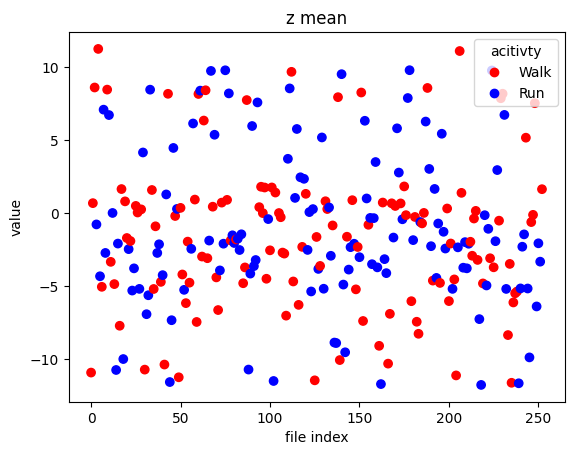

Ttest_indResult(statistic=-0.4578307911340413, pvalue=0.6474716743552804)



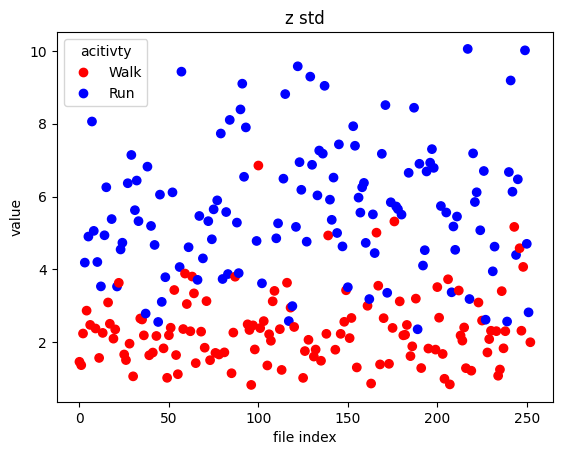

Ttest_indResult(statistic=-18.313086276360195, pvalue=4.325018013642007e-48)



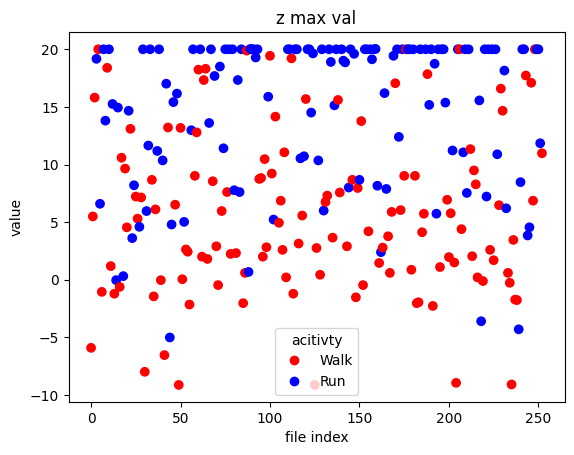

Ttest_indResult(statistic=-10.347319119033376, pvalue=4.063796046410492e-21)



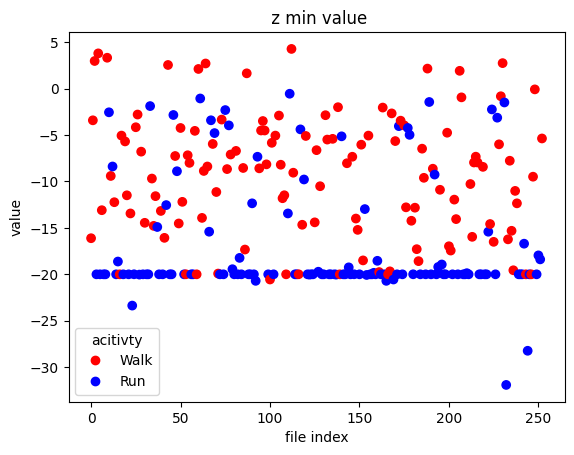

Ttest_indResult(statistic=9.201086509270853, pvalue=1.4557127819472e-17)



In [5]:
label_colors = {"walk": 'red', "run" : 'blue'}
colors = ListedColormap(['red', 'blue'])

for l_name,str_name in zip([z_mean,z_std ,z_max ,z_min],["z mean", "z std", "z max val"," z min value"]):

  list_np = np.array(l_name)
  run_vals = list_np[np.array(labels)==1]
  run_vals = run_vals[~np.isnan(run_vals)]
  walk_vals = list_np[np.array(labels)==0]
  walk_vals = walk_vals[~np.isnan(walk_vals)]
  t = scipy.stats.ttest_ind(walk_vals,run_vals)
  scatter  = plt.scatter(np.arange(len(l_name)), l_name, c=labels, cmap=colors)
  plt.title(str_name)
  plt.legend(handles=scatter.legend_elements()[0],
           title="acitivty",labels = ['Walk', 'Run'])
  plt.ylabel("value")
  plt.xlabel("file index")
  plt.show()
  print(t)
  print()

## X axis

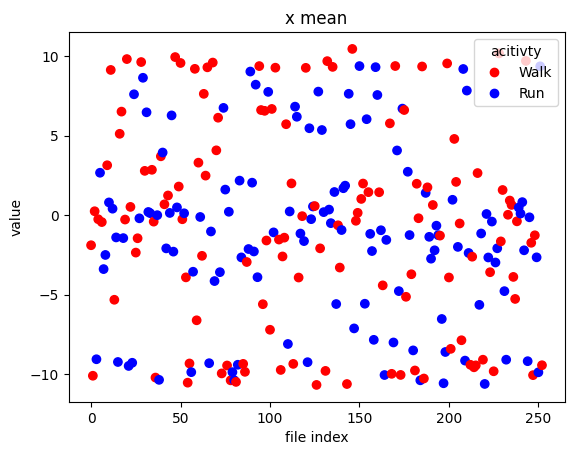

Ttest_indResult(statistic=0.6873552598295541, pvalue=0.4924985965504646)



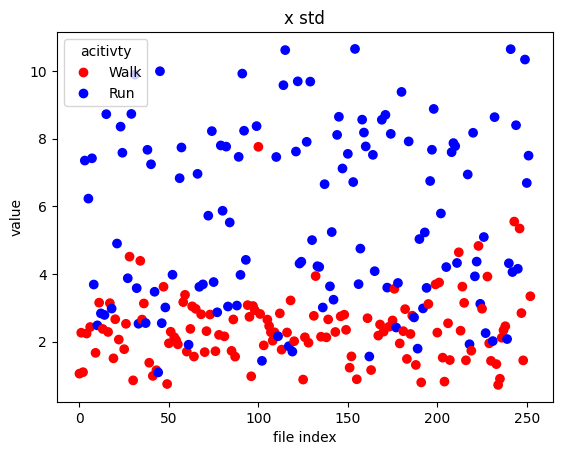

Ttest_indResult(statistic=-13.121975008031239, pvalue=2.9851099935448623e-30)



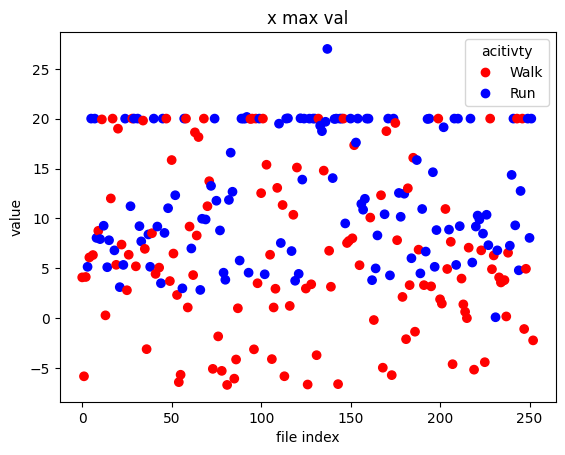

Ttest_indResult(statistic=-6.563056502589496, pvalue=3.037833047778972e-10)



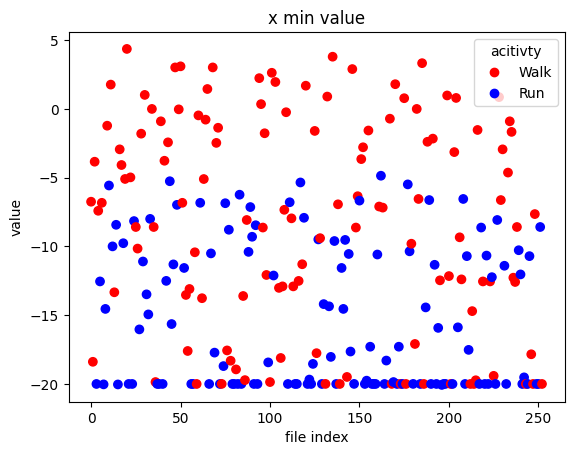

Ttest_indResult(statistic=8.309474754419146, pvalue=6.246450785470371e-15)



In [6]:
label_colors = {"walk": 'red', "run" : 'blue'}
colors = ListedColormap(['red', 'blue'])

for l_name,str_name in zip([x_mean,x_std ,x_max ,x_min],["x mean", "x std", "x max val","x min value"]):

  list_np = np.array(l_name)
  run_vals = list_np[np.array(labels)==1]
  run_vals = run_vals[~np.isnan(run_vals)]
  walk_vals = list_np[np.array(labels)==0]
  walk_vals = walk_vals[~np.isnan(walk_vals)]
  t = scipy.stats.ttest_ind(walk_vals,run_vals)
  scatter  = plt.scatter(np.arange(len(l_name)), l_name, c=labels, cmap=colors)
  plt.title(str_name)
  plt.legend(handles=scatter.legend_elements()[0],
           title="acitivty",labels = ['Walk', 'Run'])
  plt.ylabel("value")
  plt.xlabel("file index")
  plt.show()
  print(t)
  print()

## Y axis

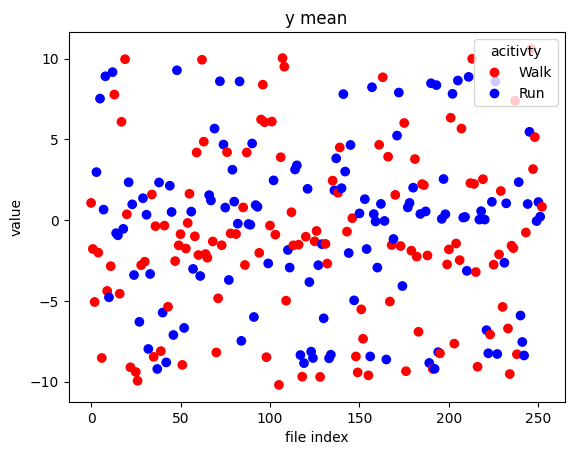

Ttest_indResult(statistic=-1.0663527609328347, pvalue=0.28729292405703155)



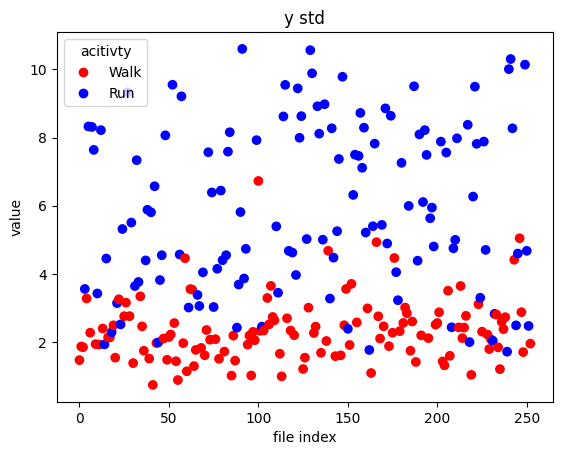

Ttest_indResult(statistic=-15.482456633481004, pvalue=2.2719880627187995e-38)



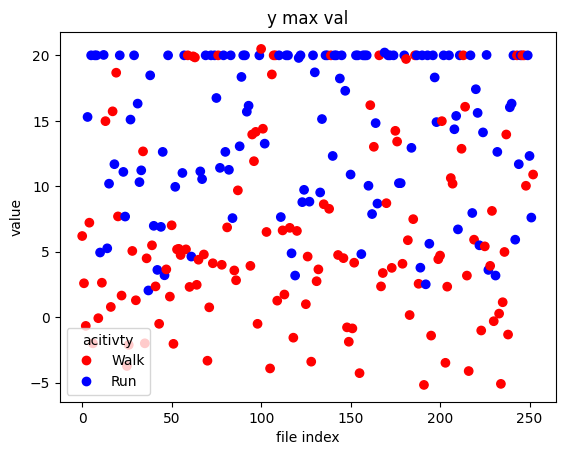

Ttest_indResult(statistic=-9.528982564927624, pvalue=1.4619401469077113e-18)



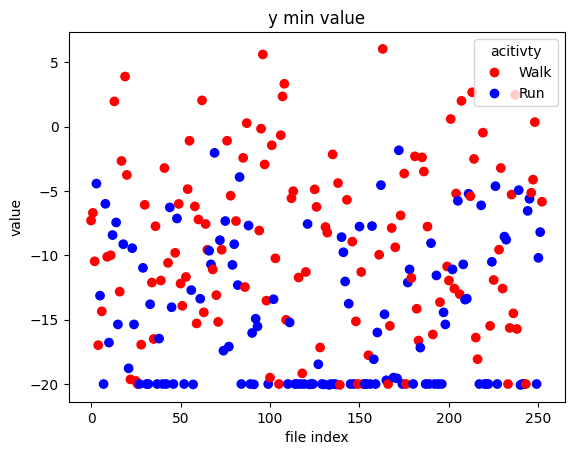

Ttest_indResult(statistic=7.176649501306721, pvalue=8.110996057977564e-12)



In [7]:
label_colors = {"walk": 'red', "run" : 'blue'}
colors = ListedColormap(['red', 'blue'])

for l_name,str_name in zip([y_mean,y_std ,y_max ,y_min],["y mean", "y std", "y max val","y min value"]):

  list_np = np.array(l_name)
  run_vals = list_np[np.array(labels)==1]
  run_vals = run_vals[~np.isnan(run_vals)]
  walk_vals = list_np[np.array(labels)==0]
  walk_vals = walk_vals[~np.isnan(walk_vals)]
  t = scipy.stats.ttest_ind(walk_vals,run_vals)
  scatter  = plt.scatter(np.arange(len(l_name)), l_name, c=labels, cmap=colors)
  plt.title(str_name)
  plt.legend(handles=scatter.legend_elements()[0],
           title="acitivty",labels = ['Walk', 'Run'])
  plt.ylabel("value")
  plt.xlabel("file index")
  plt.show()
  print(t)
  print()

## Transformed Norm values

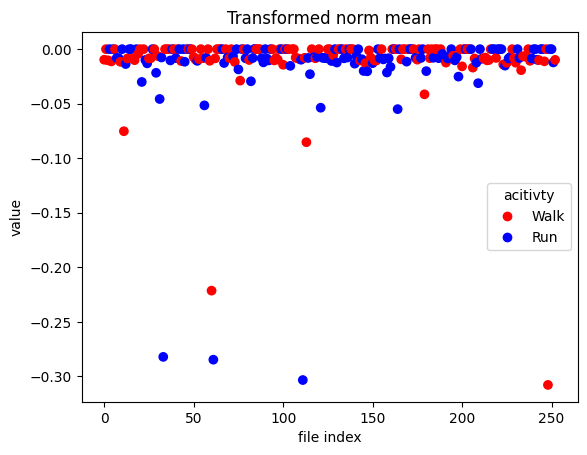

Ttest_indResult(statistic=0.9035716012690773, pvalue=0.36708896915568856)



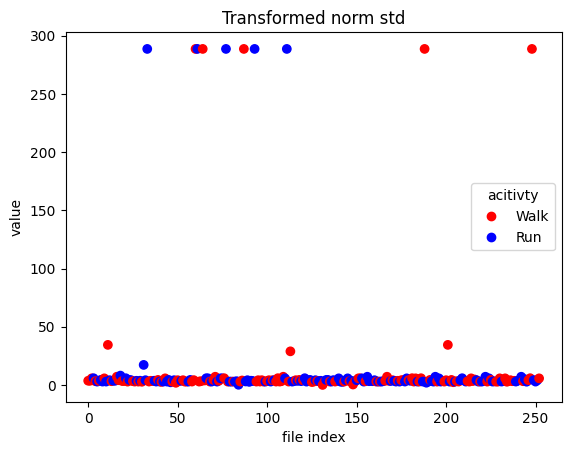

Ttest_indResult(statistic=0.058136372987032524, pvalue=0.9536862578956278)



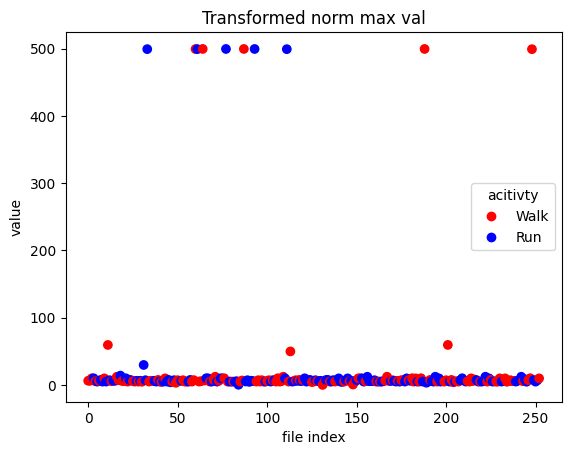

Ttest_indResult(statistic=0.05878212160351308, pvalue=0.9531724202411271)



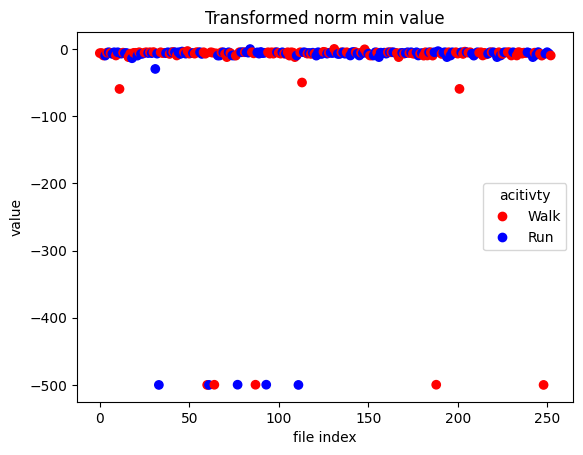

Ttest_indResult(statistic=-0.05800536451057456, pvalue=0.9537905068510943)



In [10]:
label_colors = {"walk": 'red', "run" : 'blue'}
colors = ListedColormap(['red', 'blue'])

for l_name,str_name in zip([f_mean,f_std ,f_max ,f_min],["Transformed norm mean", "Transformed norm std", "Transformed norm max val","Transformed norm min value"]):

  list_np = np.array(l_name)
  run_vals = list_np[np.array(labels)==1]
  run_vals = run_vals[~np.isnan(run_vals)]
  walk_vals = list_np[np.array(labels)==0]
  walk_vals = walk_vals[~np.isnan(walk_vals)]
  t = scipy.stats.ttest_ind(walk_vals,run_vals)
  scatter  = plt.scatter(np.arange(len(l_name)), l_name, c=labels, cmap=colors)
  plt.title(str_name)
  plt.legend(handles=scatter.legend_elements()[0],
           title="acitivty",labels = ['Walk', 'Run'])
  plt.ylabel("value")
  plt.xlabel("file index")
  plt.show()
  print(t)
  print()

In [11]:
count = 0
for path in directory_files:
  if 'run' in path:
    count += 1

num_files = len(directory_files)-1
print(f"Total files : {num_files}")
print(f"Runing files : {count}")
print(f"Walking files : {num_files - count}")

Total files : 253
Runing files : 127
Walking files : 126
